In [37]:
from scipy.stats import stats , ttest_ind
import sqlite3
from helper_func import * 

In [38]:
# Loading the data 

conn = sqlite3.connect('vendor_inventory.db')
conn

In [39]:
tables = pd.read_sql_query("select name from sqlite_master where type='table'",conn)
tables

,name
0,purchases
1,purchase_prices
2,vendor_invoice
3,begin_inventory
4,end_inventory
5,sales
6,vendor_sales_summary


In [40]:
df = pd.read_sql_query("select * from vendor_sales_summary" , conn) 
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


#### Exploratory Data Analysis <br>

1. Previously,we Examine the various tables in the database to identify key variables, understand their relationships, and determine which ones should be included in the final analysis. <br>
2. In this phase of EDA, we will analyse the resultant table to gain insights into the distribution of each column. This will help us understand data patterns, identify anomalies, and ensure data quality before proceeding with further analysis. <br>


In [41]:
# summary statistics 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,32076.0,1.065065e+04,18752.934461,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,32076.0,1.803923e+04,12661.792300,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,32076.0,2.438530e+01,109.265968,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,32076.0,3.564367e+01,148.241394,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,32076.0,8.473605e+02,664.288501,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,32076.0,3.140887e+03,11094.740853,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,32076.0,3.010669e+04,123063.962691,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,32076.0,3.077482e+03,10952.509909,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,32076.0,4.223907e+04,167650.038926,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,32076.0,1.879378e+04,44951.371874,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


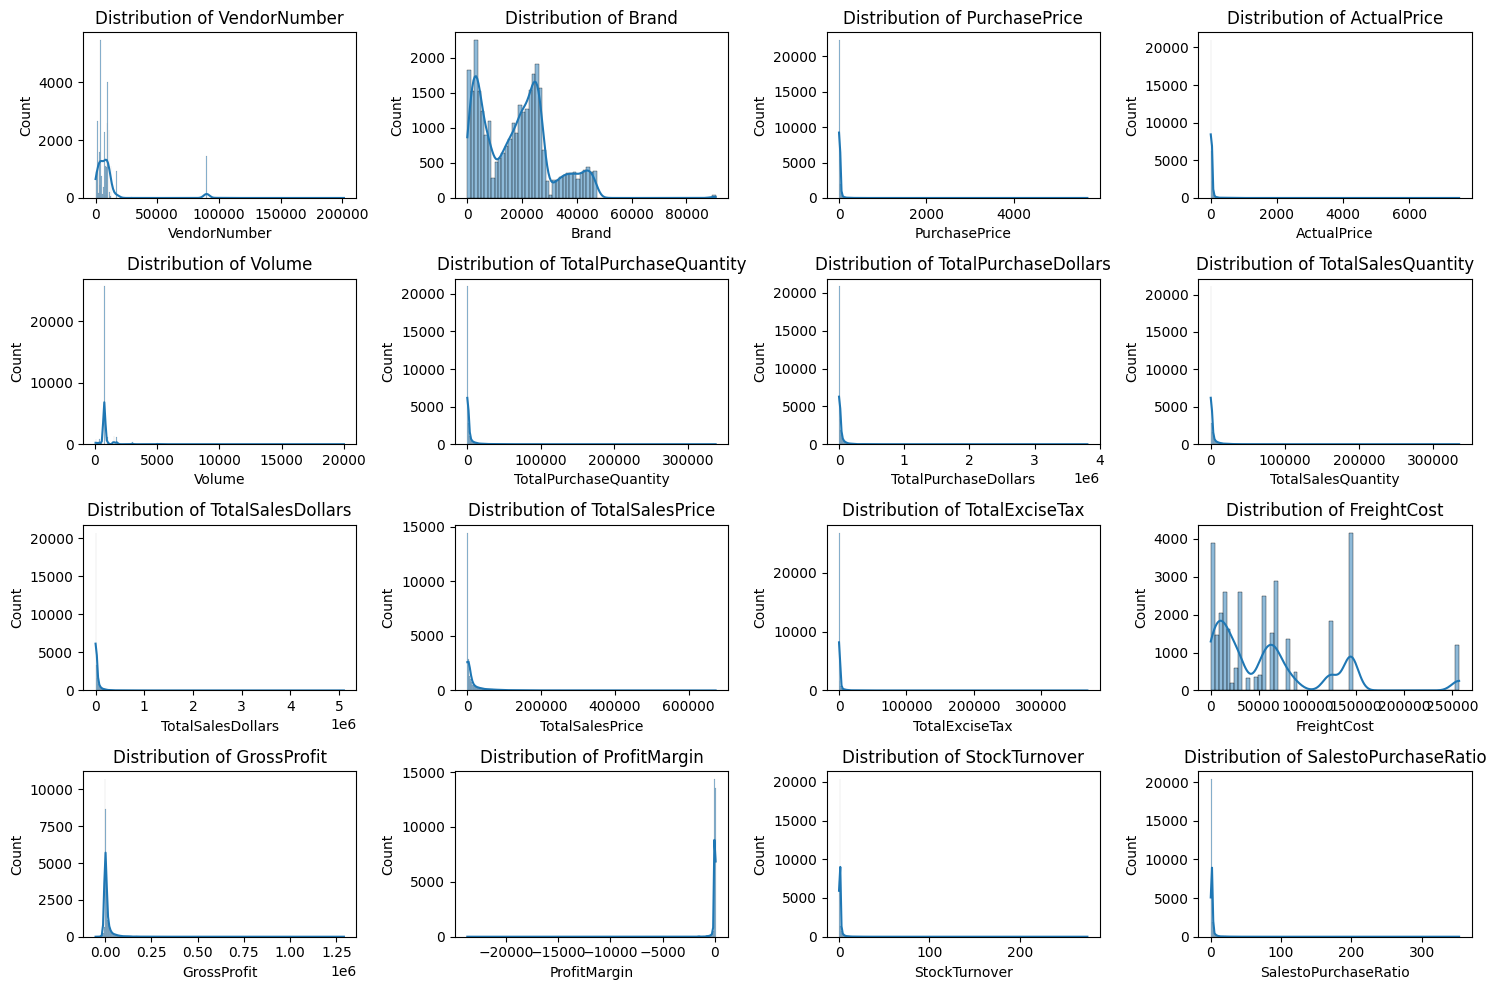

In [42]:
# Distribution plots for Numerical columns 
numerical_cols = df.select_dtypes(include = np.number).columns 

plt.figure(figsize = (15,10))

for i,col in enumerate(numerical_cols) : 
    plt.subplot(4,4,i+1)
    sns.histplot(df[col] , kde = True)
    plt.title(f"Distribution of {col}") 

plt.tight_layout()
plt.show()


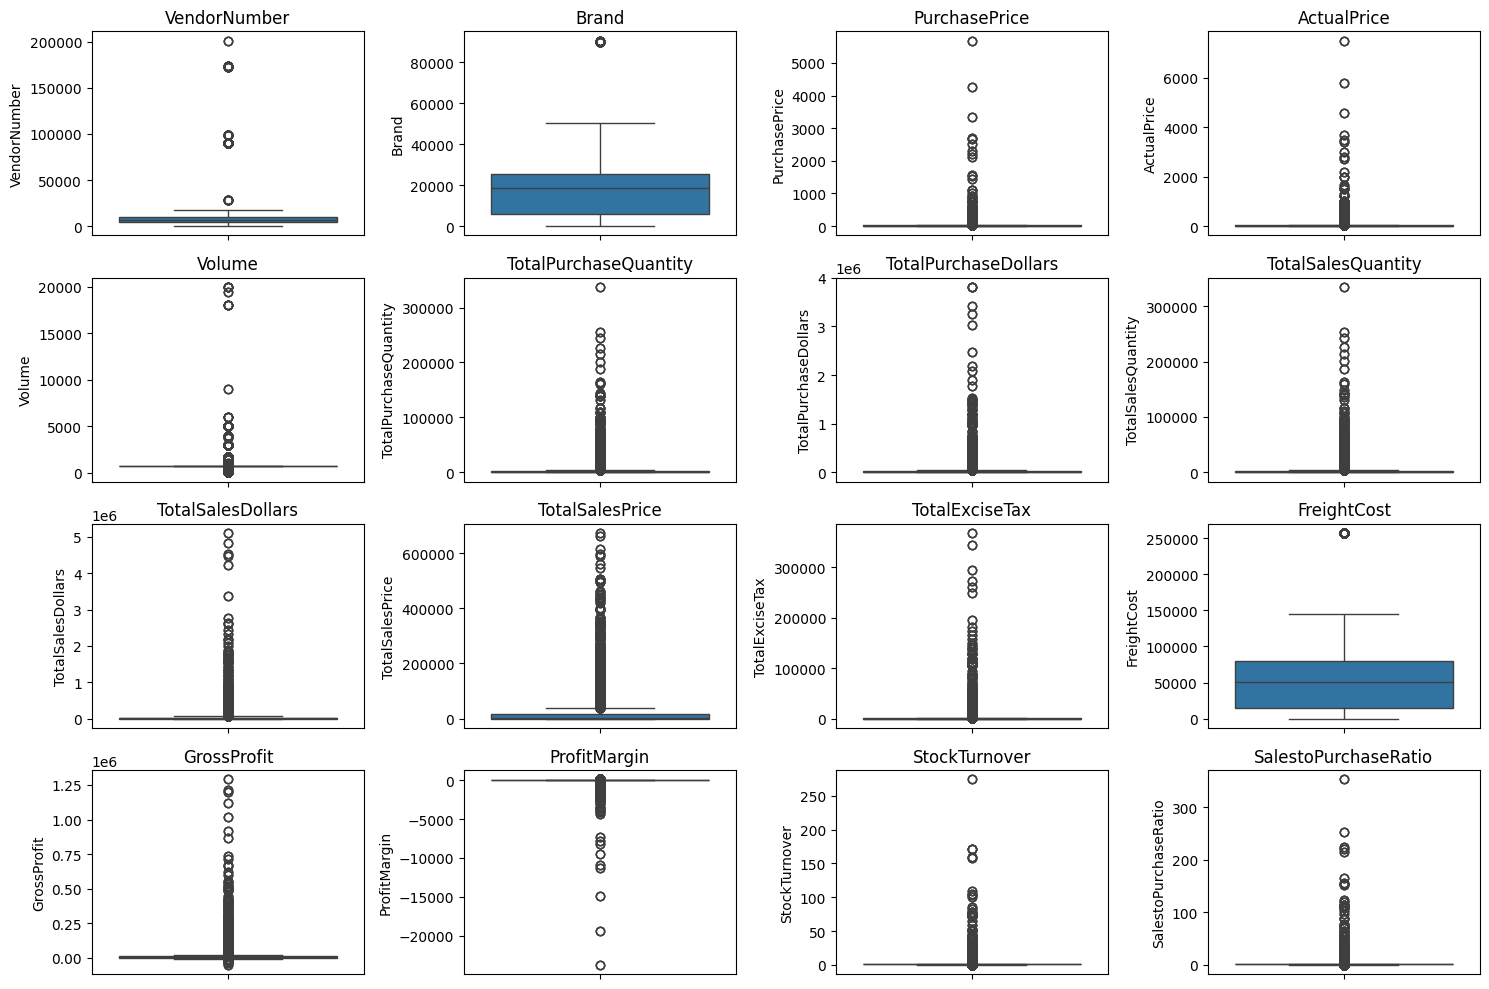

In [43]:
# Outlier detection using Boxplots 

plt.figure(figsize = (15,10))

for i,col in enumerate(numerical_cols) : 
    plt.subplot(4,4,i+1)
    sns.boxplot(y = df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

#### Summary Statistics Insight: 

Negative & Zero Values:<br>
• Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.<br>
• Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.<br>
• Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.<br> 
<br><br>
Outliers Indicated by High Standard Deviations:<br>
• Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.<br>
• Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.<br>
• Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.<br>

In [44]:
# Let's filter the data by removing inconsistencies 

df = pd.read_sql_query("""
select * from vendor_sales_summary 
where GrossProfit > 0
and ProfitMargin > 0 
and TotalSalesQuantity > 0 
""" , conn)

df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25692 entries, 0 to 25691
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorNumber           25692 non-null  int64  
 1   VendorName             25692 non-null  object 
 2   Brand                  25692 non-null  int64  
 3   Description            25692 non-null  object 
 4   PurchasePrice          25692 non-null  float64
 5   ActualPrice            25692 non-null  float64
 6   Volume                 25692 non-null  float64
 7   TotalPurchaseQuantity  25692 non-null  int64  
 8   TotalPurchaseDollars   25692 non-null  float64
 9   TotalSalesQuantity     25692 non-null  float64
 10  TotalSalesDollars      25692 non-null  float64
 11  TotalSalesPrice        25692 non-null  float64
 12  TotalExciseTax         25692 non-null  float64
 13  FreightCost            25692 non-null  float64
 14  GrossProfit            25692 non-null  float64
 15  Pr

Categorical Columns: Index(['VendorName', 'Description'], dtype='object')


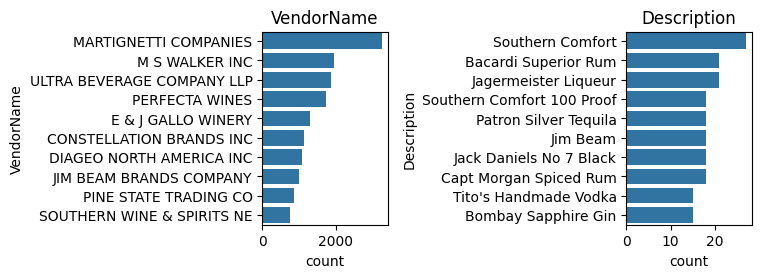

In [46]:
# Count Plots for Categorical columns 
o = (df.dtypes == 'O')
categorical_cols = o[o].index 

print(f"Categorical Columns: {categorical_cols}")

plt.figure(figsize = (15,10))

for i,col in enumerate(categorical_cols) : 
    plt.subplot(4,4,i+1)
    sns.countplot(y = df[col] , order = df[col].value_counts().index[:10]) # Top 10 Categories
    plt.title(col)

plt.tight_layout()
plt.show()


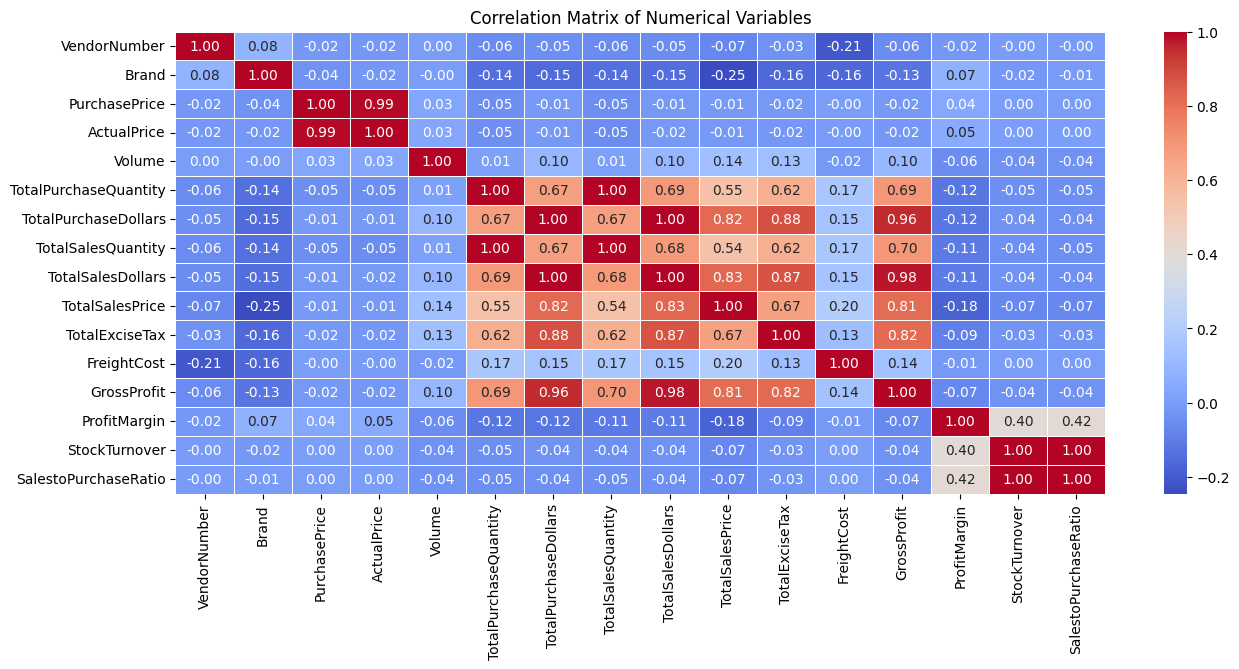

In [47]:
# Correlation Heatmaps 

plt.figure(figsize = (15,6))

correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix , annot = True , fmt = '.2f' , cmap = 'coolwarm' , linewidth=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

#### Correlation Insights <br>
<br>
• PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.01g), suggesting that price variations do not significantly impact sales revenue or profit. <br>
• Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover. <br>
• Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.<br>
• StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.<br>

#### Data Analytics <br>

Identify Brands that needs promotional or pricing adjustments which exibits lower sales performance but higher profit margins.

In [48]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars' : 'sum' , 
    'ProfitMargin' : 'mean'
}).reset_index()


In [50]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.15)

In [55]:
low_sales_threshold

np.float64(1680.897)

In [52]:
high_margin_threshold

np.float64(21.636539451905122)

In [61]:
# Filter brands with low sales but high profit margins 

target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold)& 
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
    
]

print(f"Brands with low sales but high profit margins :")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margins :


,Description,TotalSalesDollars,ProfitMargin
6942,Terruzzi & Puthod Vernaccia,14.97,32.464930
148,Albero Sparkling Wh Organic,17.37,28.497409
2897,Firefly Ridge Chard,17.37,31.088083
6488,Smirnoff Light Strawberry,17.82,50.168350
4131,Kirkland Signature Supr Brdx,23.97,32.916145
7089,Tijuana White Tequilla,26.97,28.587319
5877,Redtree Moscato,26.97,35.483871
1646,Ch Lestiac Cotes de Bordeaux,28.47,35.089568
5356,Pacifico Sur Rsv Malbec,29.97,31.031031
6199,Santa Rita Organic Svgn Bl,29.97,66.466466


In [68]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000] # For better Visualization

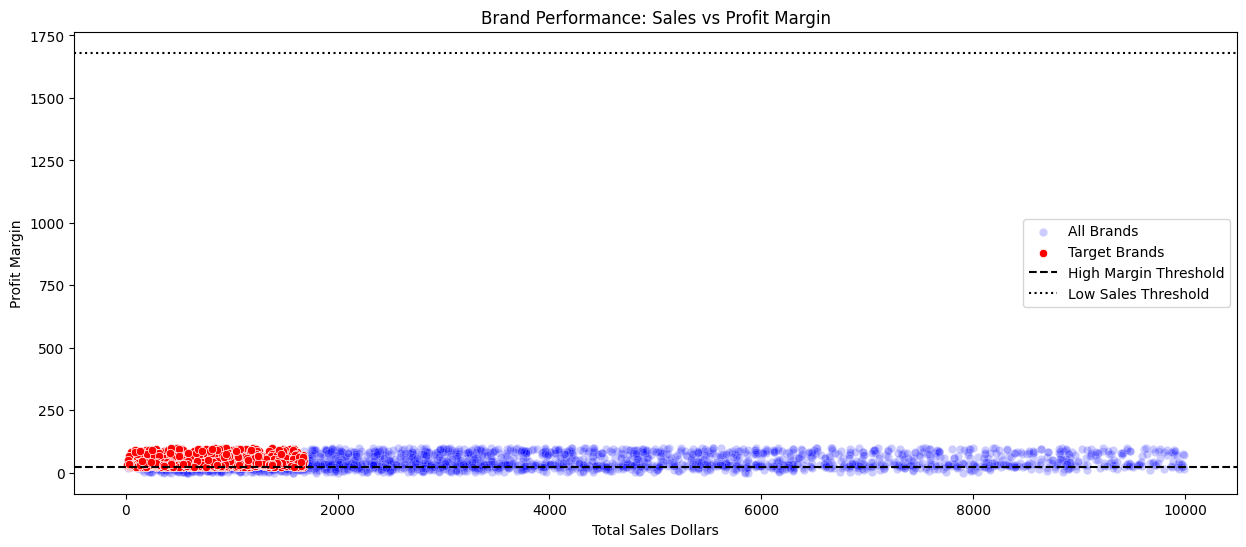

In [69]:
plt.figure(figsize = (15,6))
sns.scatterplot(data = brand_performance , x = 'TotalSalesDollars' , y = 'ProfitMargin', color = 'blue', label = 'All Brands' , alpha = 0.2)
sns.scatterplot(data = target_brands , x = 'TotalSalesDollars' , y = 'ProfitMargin', color = 'red', label = 'Target Brands')

plt.axhline(high_margin_threshold , linestyle = '--' , color = 'black' , label = 'High Margin Threshold')
plt.axhline(low_sales_threshold , linestyle = ':' , color = 'black' , label = 'Low Sales Threshold')

plt.xlabel('Total Sales Dollars')
plt.ylabel('Profit Margin')
plt.title('Brand Performance: Sales vs Profit Margin')
plt.legend()
plt.show()

Which vendors and brands demostrate the highest sales performance ? 

In [152]:
def format_dollars(value) : 
    if value>= 1_000_000 : 
        return f"{value/1_000_000:.2f}M"
    elif value>= 1_000 : 
        return f"{value/1_000:.2f}K"
    else : 
        return f"{value:.2f}"

In [95]:
# Top vendors & brands by sales performance 

top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

top_vendors

VendorName
DIAGEO NORTH AMERICA INC      2.039703e+08
MARTIGNETTI COMPANIES         1.179911e+08
PERNOD RICARD USA             9.618959e+07
JIM BEAM BRANDS COMPANY       9.426906e+07
BACARDI USA INC               7.456445e+07
CONSTELLATION BRANDS INC      7.265624e+07
E & J GALLO WINERY            5.519970e+07
BROWN-FORMAN CORP             5.474169e+07
ULTRA BEVERAGE COMPANY LLP    4.950763e+07
M S WALKER INC                4.411938e+07
Name: TotalSalesDollars, dtype: float64

In [71]:
top_brands

Description
Jack Daniels No 7 Black    23894240.28
Tito's Handmade Vodka      22198972.74
Grey Goose Vodka           21628824.18
Capt Morgan Spiced Rum     19068961.86
Absolut 80 Proof           18734256.09
Jameson Irish Whiskey      17147279.07
Ketel One Vodka            15210250.68
Baileys Irish Cream        12450366.21
Kahlua                     10814575.98
Tanqueray                  10370093.70
Name: TotalSalesDollars, dtype: float64

In [96]:
top_vendors.apply(lambda x : format_dollars(x))

VendorName
DIAGEO NORTH AMERICA INC      203.97M
MARTIGNETTI COMPANIES         117.99M
PERNOD RICARD USA              96.19M
JIM BEAM BRANDS COMPANY        94.27M
BACARDI USA INC                74.56M
CONSTELLATION BRANDS INC       72.66M
E & J GALLO WINERY             55.20M
BROWN-FORMAN CORP              54.74M
ULTRA BEVERAGE COMPANY LLP     49.51M
M S WALKER INC                 44.12M
Name: TotalSalesDollars, dtype: object

In [97]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    23.89M
Tito's Handmade Vodka      22.20M
Grey Goose Vodka           21.63M
Capt Morgan Spiced Rum     19.07M
Absolut 80 Proof           18.73M
Jameson Irish Whiskey      17.15M
Ketel One Vodka            15.21M
Baileys Irish Cream        12.45M
Kahlua                     10.81M
Tanqueray                  10.37M
Name: TotalSalesDollars, dtype: object

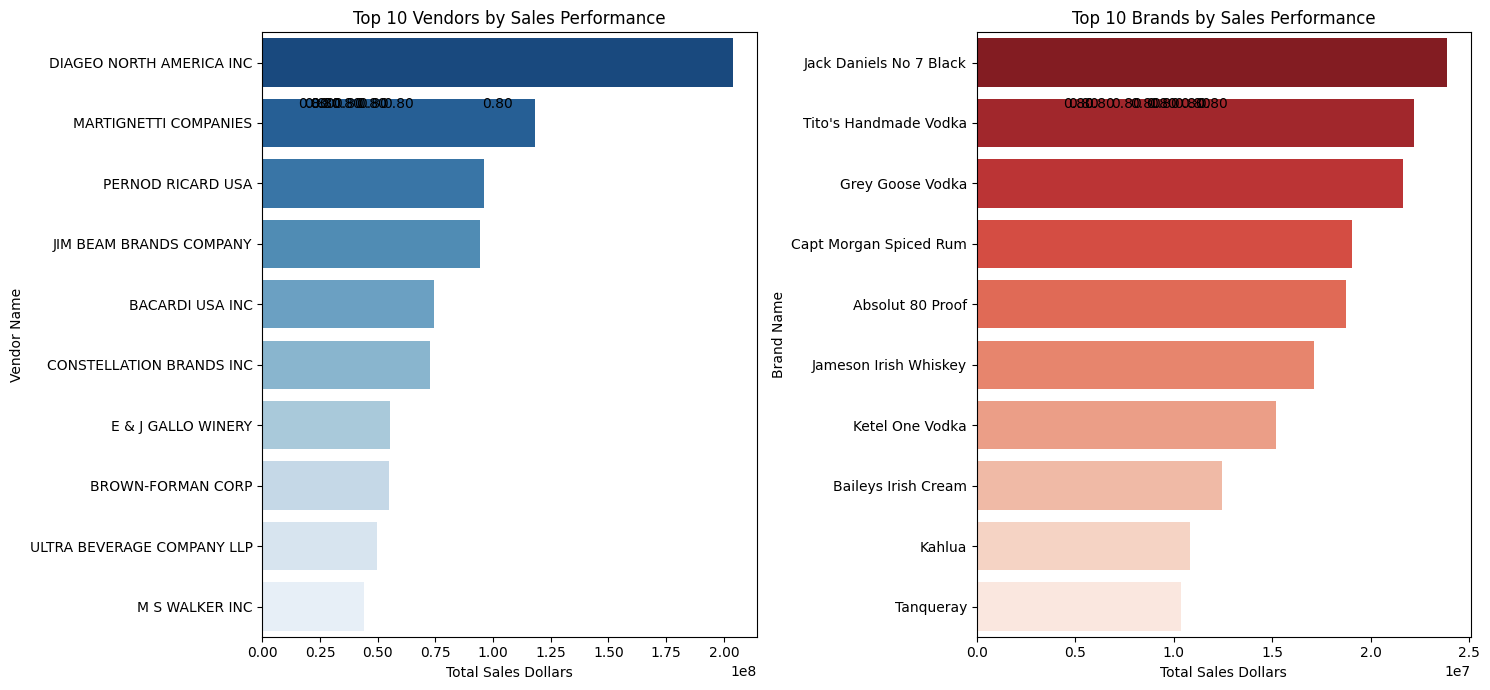

In [98]:
plt.figure(figsize = (15,7))

# Plot for top vendors 
plt.subplot(1,2,1)
ax1 = sns.barplot(y = top_vendors.index , x = top_vendors.values , palette = 'Blues_r')
plt.title('Top 10 Vendors by Sales Performance')
plt.xlabel('Total Sales Dollars')
plt.ylabel('Vendor Name') 

for bar in ax1.patches : 
        ax1.annotate(format_dollars(bar.get_height()),
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center',
                    size=10, xytext=(0, 5),
                    textcoords='offset points')

# Plot for Top Brands 
plt.subplot(1,2,2)
ax2 = sns.barplot(y = top_brands.index.astype(str) , x = top_brands.values , palette = 'Reds_r')
plt.title('Top 10 Brands by Sales Performance')
plt.xlabel('Total Sales Dollars')
plt.ylabel('Brand Name') 

for bar in ax2.patches : 
        ax2.annotate(format_dollars(bar.get_height()),
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center',
                    size=10, xytext=(0, 5),
                    textcoords='offset points') 


plt.tight_layout()
plt.show()


Which vendors contribute the most to total purchase dollars ? 

In [99]:
vendor_performance = df.groupby('VendorName').agg(
    {
        'TotalPurchaseDollars' : 'sum' , 
        'GrossProfit' : 'sum' , 
        'TotalSalesDollars' : 'sum' , 
    }
).reset_index()

In [123]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum() * 100

In [124]:
top_vendors = round(vendor_performance.sort_values('PurchaseContribution%' , ascending = False),2)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars) 

In [125]:
top_10_vendors = top_vendors.head(10)


In [126]:
top_10_vendors['PurchaseContribution%'].sum()

np.float64(65.69000000000001)

In [127]:
top_10_vendors['Cumulative_contribution%'] = top_10_vendors['PurchaseContribution%'].cumsum()
top_10_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_contribution%
25,DIAGEO NORTH AMERICA INC,150.29M,53.68M,203.97M,16.30,16.30
57,MARTIGNETTI COMPANIES,76.51M,41.48M,117.99M,8.30,24.60
68,PERNOD RICARD USA,71.55M,24.64M,96.19M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,70.48M,23.79M,94.27M,7.64,40.00
6,BACARDI USA INC,52.30M,22.27M,74.56M,5.67,45.67
20,CONSTELLATION BRANDS INC,45.82M,26.84M,72.66M,4.97,50.64
11,BROWN-FORMAN CORP,39.72M,15.02M,54.74M,4.31,54.95
30,E & J GALLO WINERY,36.21M,18.99M,55.20M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,33.50M,16.01M,49.51M,3.63,62.51
53,M S WALKER INC,29.29M,14.83M,44.12M,3.18,65.69


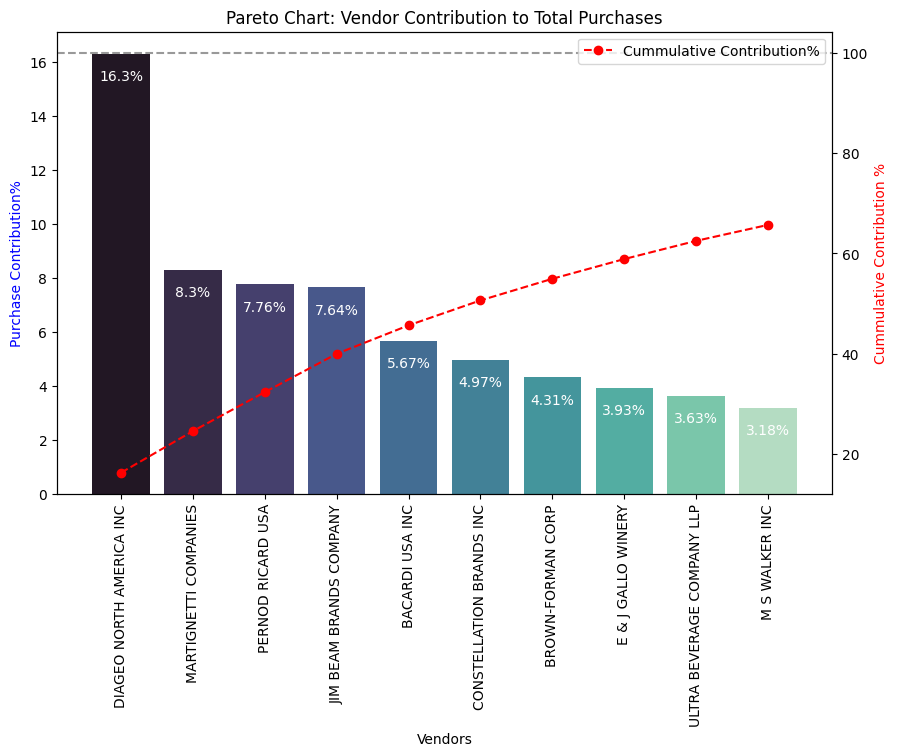

In [129]:
fig , ax1 = plt.subplots(figsize = (10,6))

# Bar-Plot for Purchase Contribution% 
sns.barplot(x = top_10_vendors['VendorName'] , y = top_10_vendors[f'PurchaseContribution%'] , palette = 'mako' , ax = ax1)

for i,val in enumerate(top_10_vendors['PurchaseContribution%']) : 
    ax1.text(i,val-1,str(val)+"%" , ha = 'center' , fontsize = 10 , color = 'white')


# Line-Plot for Cummulative Contribution% 
ax2 = ax1.twinx()
ax2.plot(top_10_vendors['VendorName'] , top_10_vendors['Cumulative_contribution%'], color = 'red' , marker = 'o' , linestyle = 'dashed' , label = 'Cummulative Contribution%')

ax1.set_xticklabels(top_10_vendors['VendorName'] , rotation = 90)
ax1.set_ylabel('Purchase Contribution%' , color = 'blue')
ax2.set_ylabel('Cummulative Contribution %' , color = 'red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y = 100 , color = 'gray' , linestyle = 'dashed' , alpha = 0.8)
ax2.legend(loc = 'upper right')
plt.show()

How much of Total Procurement is dependent on the Top 10 Vendors ? 

In [130]:
print(f"Total Purchase Contribution of Top 10 Vendors is {round(top_10_vendors['PurchaseContribution%'].sum(),2)}%")

Total Purchase Contribution of Top 10 Vendors is 65.69%


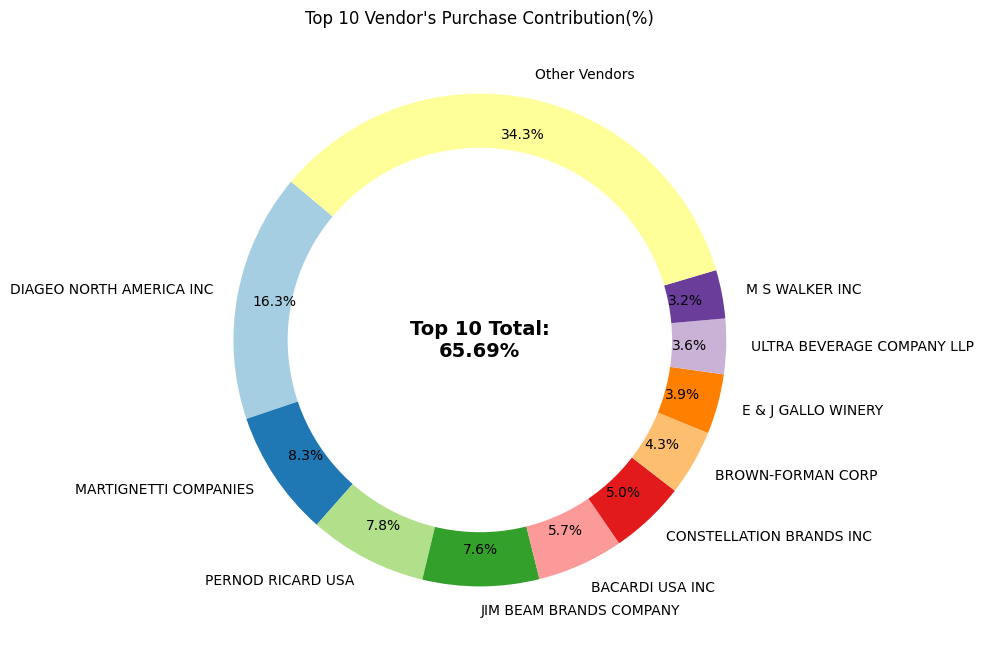

In [131]:
vendors = list(top_10_vendors['VendorName'].values)
purchase_contributions = list(top_10_vendors['PurchaseContribution%'].values)
total_contributions = sum(purchase_contributions)
remaining = 100 - total_contributions

# Append "Other Vendors" Catogories 
vendors.append("Other Vendors")
purchase_contributions.append(remaining)

# Donut Chart 
fig,ax = plt.subplots(figsize = (10,8))
wedges , texts , autotexts = ax.pie(purchase_contributions , labels = vendors , autopct = '%1.1f%%' , startangle = 140 , pctdistance = 0.85 , colors = plt.cm.Paired.colors)

# Draw a white circle in the center to create a "Donut" Effect. 
centre_circle = plt.Circle((0,0),0.78,fc = 'white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center 
plt.text(0,0,f"Top 10 Total:\n{total_contributions:.2f}%" , fontsize = 14,fontweight='bold',ha='center',va='center')

plt.title("Top 10 Vendor's Purchase Contribution(%)")
plt.show()

Does Purchasing in bulk reduce the unit price , and what is the optimal purchase volume for cost saving ? 

In [132]:
df['UnitPurchasePrice'] = df[f'TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [133]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89


In [134]:
df['OrderSize']= pd.qcut(df['TotalPurchaseQuantity'] , q=3,labels = ['Small','Medium','Large'])


In [135]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice,OrderSize
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27,Large
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19,Large
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24,Large
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17,Large
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89,Large


In [136]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.482067
Large,10.778675


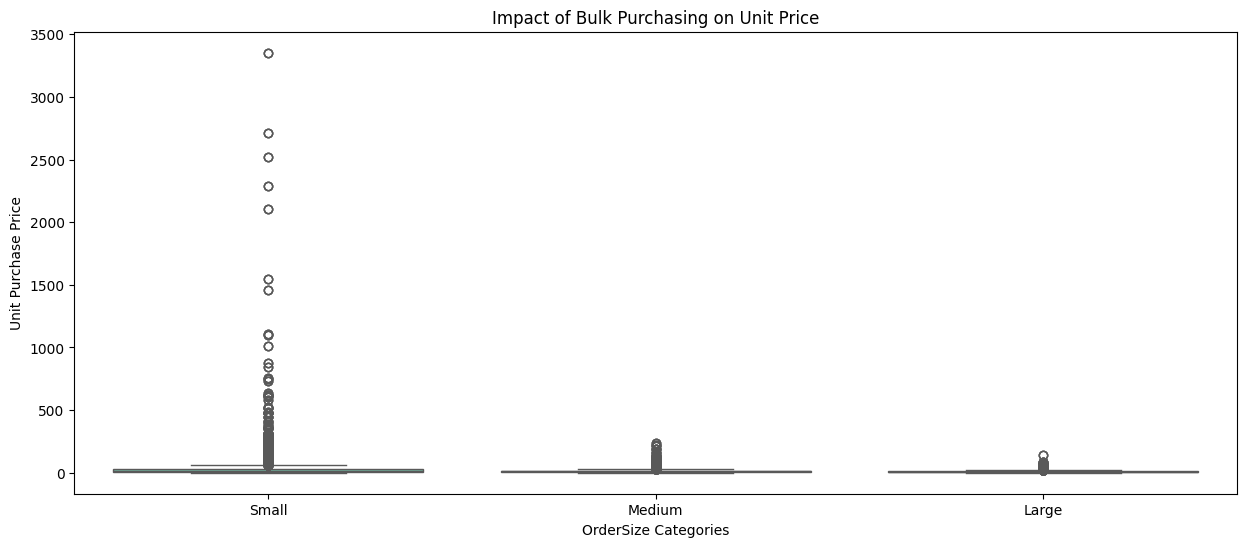

In [139]:
plt.figure(figsize = (15,6))

sns.boxplot(data = df , x = 'OrderSize' , y = 'UnitPurchasePrice' , palette='Set2')
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("OrderSize Categories")
plt.ylabel("Unit Purchase Price")
plt.show()

The more the vendors are purchasing in bulk, the lesser the UnitPurchase is. 
<br>
• Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently. <br>
• The price difference between Small and Large orders is substantial (~72% reduction in unit cost)<br>
• This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.<br>


Which Vendor have low inventory turnover , indicating excess stock and slow-moving products? 

In [ ]:
df[df['StockTurnover'] < 1].groupby('VendorName')[['StockTurnover']].mean().sort_values()

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
ALTAMAR BRANDS LLC,0.959375
AMERICAN SPIRITS EXCHANGE,0.875000
AMERICAN VINTAGE BEVERAGE,0.962801
ATLANTIC IMPORTING COMPANY,0.893078
BACARDI USA INC,0.941636
BANFI PRODUCTS CORP,0.920139
BLACK PRINCE DISTILLERY INC,0.969136
BRONCO WINE COMPANY,0.822601


In [143]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrossProfit',
       'ProfitMargin', 'StockTurnover', 'SalestoPurchaseRatio',
       'UnitPurchasePrice', 'OrderSize'],
      dtype='object')

In [148]:
df['UnsoldInventoryValue'] = (df['TotalPurchaseQuantity']-df['TotalSalesQuantity'] * df['PurchasePrice'])

print("Total Unsold Capital:",format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: -816980325.75
